In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# drive.mount('/content/drive')
# data = pd.read_csv('/content/drive/My Drive/Multi_core/preprocessed_data.csv')
data = pd.read_csv('../data/preprocessed_data.csv')

In [3]:
dropped_col = ['Speedup']

In [4]:
X = data.drop(dropped_col, axis=1).values
y = data[dropped_col].values

In [5]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

In [6]:
print("X_train_Size: " + str(X_train.shape))
print("y_train_Size: " + str(y_train.shape))
print("X_val_Size: " + str(X_val.shape))
print("y_val_Size: " + str(y_val.shape))
print("X_test: " + str(X_test.shape))
print("y_test_Size: " + str(y_test.shape))

X_train_Size: (7287, 27)
y_train_Size: (7287, 1)
X_val_Size: (1562, 27)
y_val_Size: (1562, 1)
X_test: (1562, 27)
y_test_Size: (1562, 1)


In [7]:
# Multiple Regression

# Model
mul_model = LinearRegression().fit(X_train, y_train)
rSqr = mul_model.score(X_train,y_train)
b0, b1 = mul_model.intercept_, mul_model.coef_

In [8]:
# Prediction
y_pred = mul_model.predict(X_test)

# Evaluation
print("Linear Regression")
mul_rSqr = r2_score(y_test, y_pred)
mul_mae = mean_absolute_error(y_test, y_pred)
mul_mse = mean_squared_error(y_test, y_pred)
mul_rmse = np.sqrt(mul_mse)
print(f"Test R-Squared: {mul_rSqr:.4f}, Test MSE: {mul_mse:.4f}, Test MAE: {mul_mae:.4f}, Test RMSE: {mul_rmse:.4f}")

Linear Regression
Test R-Squared: 0.7496, Test MSE: 1.2779, Test MAE: 0.8253, Test RMSE: 1.1304


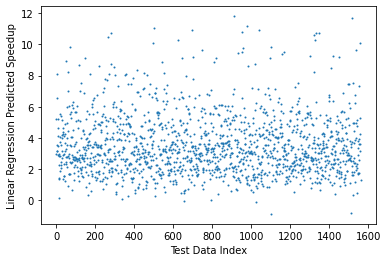

In [9]:
plt.scatter(range(len(y_pred)), y_pred, s=1)
plt.xlabel("Test Data Index")
plt.ylabel("Linear Regression Predicted Speedup")
plt.show()

In [10]:
# Random Forest Regression

# Model
rf_model = RandomForestRegressor().fit(X_train, y_train.ravel()) 
# maximum depth of the trees = 2 to prevent overfitting

# Prediction
y_pred = rf_model.predict(X_test)
# print(y_pred)

# Evaluation
print("Random Forest Regression")
rf_rSqr = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
print(f"Test R-Squared: {rf_rSqr:.4f}, Test MSE: {rf_mse:.4f}, Test MAE: {rf_mae:.4f}, Test RMSE: {rf_rmse:.4f}")

Random Forest Regression
Test R-Squared: 0.9867, Test MSE: 0.0680, Test MAE: 0.1401, Test RMSE: 0.2608


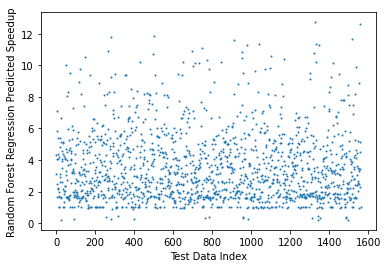

In [11]:
plt.scatter(range(len(y_pred)), y_pred, s=1)
plt.xlabel("Test Data Index")
plt.ylabel("Random Forest Regression Predicted Speedup")
plt.show()

In [12]:
# LASSO Regression

# Scale the input
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the model
lasso_model = Lasso(alpha=0.1, max_iter=10000, tol=0.01).fit(X_train_scaled, y_train)
# alpha/the amount of regularization is 0.1; max #iterations is 10,000; tolerance level is 0.01 to improve convergence
lasso_coef = lasso_model.coef_

# Prediction
y_pred = lasso_model.predict(X_test_scaled)

# Evaluation
print("LASSO Regression")
lasso_rSqr = r2_score(y_test, y_pred)
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_rmse = np.sqrt(lasso_mse)
print(f"Test R-Squared: {lasso_rSqr:.4f}, Test MSE: {lasso_mse:.4f}, Test MAE: {lasso_mae:.4f}, Test RMSE: {lasso_rmse:.4f}")

LASSO Regression
Test R-Squared: 0.5722, Test MSE: 2.1829, Test MAE: 1.0408, Test RMSE: 1.4775


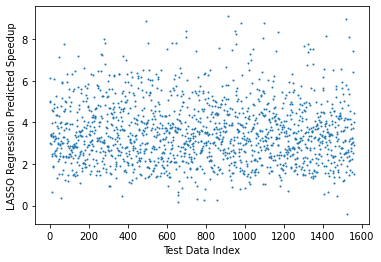

In [13]:
plt.scatter(range(len(y_pred)), y_pred, s=1)
plt.xlabel("Test Data Index")
plt.ylabel("LASSO Regression Predicted Speedup")
plt.show()